In [45]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 5

setup_random_seed(RANDOM_SEED)

In [46]:
df = pd.read_csv('data/01_raw/CatData/diamonds/diamonds.csv', index_col=0)

In [47]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [48]:
x = df.drop(columns = ['price'])
y = np.log10(df[['price']])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [50]:
x_train.shape, x_test.shape

((43152, 9), (10788, 9))

In [51]:
model = catboost.CatBoostRegressor(
    cat_features=['cut', 'color', 'clarity'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_seed=RANDOM_SEED
)

In [52]:
%time model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5572902	test: 0.5557809	best: 0.5557809 (0)	total: 10ms	remaining: 20s
1:	learn: 0.5209567	test: 0.5195124	best: 0.5195124 (1)	total: 17.9ms	remaining: 17.8s
2:	learn: 0.4885266	test: 0.4871662	best: 0.4871662 (2)	total: 26ms	remaining: 17.3s
3:	learn: 0.4590391	test: 0.4577245	best: 0.4577245 (3)	total: 33.3ms	remaining: 16.6s
4:	learn: 0.4311628	test: 0.4298390	best: 0.4298390 (4)	total: 41.7ms	remaining: 16.6s
5:	learn: 0.4053222	test: 0.4040309	best: 0.4040309 (5)	total: 49.6ms	remaining: 16.5s
6:	learn: 0.3803843	test: 0.3791126	best: 0.3791126 (6)	total: 57.3ms	remaining: 16.3s
7:	learn: 0.3561466	test: 0.3549281	best: 0.3549281 (7)	total: 65.6ms	remaining: 16.3s
8:	learn: 0.3328690	test: 0.3316804	best: 0.3316804 (8)	total: 73.8ms	remaining: 16.3s
9:	learn: 0.3100851	test: 0.3089247	best: 0.3089247 (9)	total: 80.7ms	remaining: 16.1s
10:	learn: 0.2876649	test: 0.2864923	best: 0.2864923 (10)	total: 88.2ms	remaining: 15.9s
11:	learn: 0.2660470	test: 0.2648866	best: 0.26

93:	learn: -1.1385503	test: -1.1419990	best: -1.1419990 (93)	total: 617ms	remaining: 12.5s
94:	learn: -1.1442297	test: -1.1476696	best: -1.1476696 (94)	total: 618ms	remaining: 12.4s
95:	learn: -1.1554765	test: -1.1591417	best: -1.1591417 (95)	total: 625ms	remaining: 12.4s
96:	learn: -1.1638499	test: -1.1675435	best: -1.1675435 (96)	total: 631ms	remaining: 12.4s
97:	learn: -1.1706680	test: -1.1743851	best: -1.1743851 (97)	total: 637ms	remaining: 12.4s
98:	learn: -1.1790638	test: -1.1825044	best: -1.1825044 (98)	total: 644ms	remaining: 12.4s
99:	learn: -1.1878757	test: -1.1912544	best: -1.1912544 (99)	total: 650ms	remaining: 12.3s
100:	learn: -1.1959960	test: -1.1993503	best: -1.1993503 (100)	total: 656ms	remaining: 12.3s
101:	learn: -1.2067453	test: -1.2100657	best: -1.2100657 (101)	total: 661ms	remaining: 12.3s
102:	learn: -1.2149723	test: -1.2182047	best: -1.2182047 (102)	total: 667ms	remaining: 12.3s
103:	learn: -1.2233727	test: -1.2265499	best: -1.2265499 (103)	total: 675ms	remainin

202:	learn: -1.5196985	test: -1.5153147	best: -1.5153147 (202)	total: 1.22s	remaining: 10.8s
203:	learn: -1.5203170	test: -1.5157972	best: -1.5157972 (203)	total: 1.23s	remaining: 10.8s
204:	learn: -1.5212773	test: -1.5166839	best: -1.5166839 (204)	total: 1.24s	remaining: 10.8s
205:	learn: -1.5223547	test: -1.5177089	best: -1.5177089 (205)	total: 1.24s	remaining: 10.8s
206:	learn: -1.5229518	test: -1.5182985	best: -1.5182985 (206)	total: 1.25s	remaining: 10.8s
207:	learn: -1.5235844	test: -1.5187909	best: -1.5187909 (207)	total: 1.26s	remaining: 10.8s
208:	learn: -1.5237468	test: -1.5188533	best: -1.5188533 (208)	total: 1.26s	remaining: 10.8s
209:	learn: -1.5246026	test: -1.5197007	best: -1.5197007 (209)	total: 1.26s	remaining: 10.8s
210:	learn: -1.5252814	test: -1.5203595	best: -1.5203595 (210)	total: 1.27s	remaining: 10.8s
211:	learn: -1.5266869	test: -1.5217360	best: -1.5217360 (211)	total: 1.27s	remaining: 10.8s
212:	learn: -1.5279516	test: -1.5230797	best: -1.5230797 (212)	total: 

303:	learn: -1.6100568	test: -1.5994050	best: -1.5994050 (303)	total: 1.83s	remaining: 10.2s
304:	learn: -1.6110069	test: -1.6004096	best: -1.6004096 (304)	total: 1.84s	remaining: 10.2s
305:	learn: -1.6114238	test: -1.6007491	best: -1.6007491 (305)	total: 1.84s	remaining: 10.2s
306:	learn: -1.6119113	test: -1.6011061	best: -1.6011061 (306)	total: 1.85s	remaining: 10.2s
307:	learn: -1.6128384	test: -1.6020901	best: -1.6020901 (307)	total: 1.85s	remaining: 10.2s
308:	learn: -1.6128551	test: -1.6020786	best: -1.6020901 (307)	total: 1.86s	remaining: 10.2s
309:	learn: -1.6135432	test: -1.6030305	best: -1.6030305 (309)	total: 1.86s	remaining: 10.2s
310:	learn: -1.6141173	test: -1.6034817	best: -1.6034817 (310)	total: 1.87s	remaining: 10.2s
311:	learn: -1.6147579	test: -1.6041437	best: -1.6041437 (311)	total: 1.88s	remaining: 10.1s
312:	learn: -1.6152241	test: -1.6045957	best: -1.6045957 (312)	total: 1.88s	remaining: 10.1s
313:	learn: -1.6158053	test: -1.6052262	best: -1.6052262 (313)	total: 

398:	learn: -1.6819008	test: -1.6681520	best: -1.6681520 (398)	total: 2.44s	remaining: 9.78s
399:	learn: -1.6827534	test: -1.6688352	best: -1.6688352 (399)	total: 2.45s	remaining: 9.79s
400:	learn: -1.6833220	test: -1.6693026	best: -1.6693026 (400)	total: 2.45s	remaining: 9.78s
401:	learn: -1.6838789	test: -1.6697406	best: -1.6697406 (401)	total: 2.46s	remaining: 9.78s
402:	learn: -1.6843289	test: -1.6701632	best: -1.6701632 (402)	total: 2.46s	remaining: 9.77s
403:	learn: -1.6847434	test: -1.6706400	best: -1.6706400 (403)	total: 2.47s	remaining: 9.77s
404:	learn: -1.6851439	test: -1.6708841	best: -1.6708841 (404)	total: 2.48s	remaining: 9.77s
405:	learn: -1.6858011	test: -1.6714959	best: -1.6714959 (405)	total: 2.49s	remaining: 9.76s
406:	learn: -1.6863187	test: -1.6719489	best: -1.6719489 (406)	total: 2.49s	remaining: 9.76s
407:	learn: -1.6871340	test: -1.6727828	best: -1.6727828 (407)	total: 2.5s	remaining: 9.76s
408:	learn: -1.6881171	test: -1.6736752	best: -1.6736752 (408)	total: 2

489:	learn: -1.7196075	test: -1.6979060	best: -1.6979060 (489)	total: 3.05s	remaining: 9.39s
490:	learn: -1.7198486	test: -1.6980373	best: -1.6980373 (490)	total: 3.05s	remaining: 9.39s
491:	learn: -1.7201385	test: -1.6981633	best: -1.6981633 (491)	total: 3.06s	remaining: 9.38s
492:	learn: -1.7202754	test: -1.6983163	best: -1.6983163 (492)	total: 3.07s	remaining: 9.38s
493:	learn: -1.7205297	test: -1.6984549	best: -1.6984549 (493)	total: 3.07s	remaining: 9.37s
494:	learn: -1.7207954	test: -1.6986421	best: -1.6986421 (494)	total: 3.08s	remaining: 9.37s
495:	learn: -1.7211588	test: -1.6988043	best: -1.6988043 (495)	total: 3.09s	remaining: 9.36s
496:	learn: -1.7215877	test: -1.6992136	best: -1.6992136 (496)	total: 3.09s	remaining: 9.36s
497:	learn: -1.7218171	test: -1.6993342	best: -1.6993342 (497)	total: 3.1s	remaining: 9.35s
498:	learn: -1.7221191	test: -1.6995682	best: -1.6995682 (498)	total: 3.11s	remaining: 9.35s
499:	learn: -1.7222684	test: -1.6996727	best: -1.6996727 (499)	total: 3

580:	learn: -1.7472058	test: -1.7167046	best: -1.7167046 (580)	total: 3.66s	remaining: 8.94s
581:	learn: -1.7473322	test: -1.7167199	best: -1.7167199 (581)	total: 3.66s	remaining: 8.93s
582:	learn: -1.7476845	test: -1.7169626	best: -1.7169626 (582)	total: 3.67s	remaining: 8.92s
583:	learn: -1.7478460	test: -1.7169986	best: -1.7169986 (583)	total: 3.68s	remaining: 8.92s
584:	learn: -1.7480489	test: -1.7170840	best: -1.7170840 (584)	total: 3.68s	remaining: 8.91s
585:	learn: -1.7481624	test: -1.7171494	best: -1.7171494 (585)	total: 3.69s	remaining: 8.91s
586:	learn: -1.7482796	test: -1.7172258	best: -1.7172258 (586)	total: 3.7s	remaining: 8.9s
587:	learn: -1.7484203	test: -1.7173073	best: -1.7173073 (587)	total: 3.7s	remaining: 8.89s
588:	learn: -1.7485187	test: -1.7173166	best: -1.7173166 (588)	total: 3.71s	remaining: 8.89s
589:	learn: -1.7486064	test: -1.7172979	best: -1.7173166 (588)	total: 3.72s	remaining: 8.89s
590:	learn: -1.7488201	test: -1.7174193	best: -1.7174193 (590)	total: 3.7

674:	learn: -1.7664017	test: -1.7300599	best: -1.7300599 (674)	total: 4.26s	remaining: 8.37s
675:	learn: -1.7665221	test: -1.7301468	best: -1.7301468 (675)	total: 4.27s	remaining: 8.36s
676:	learn: -1.7667195	test: -1.7302878	best: -1.7302878 (676)	total: 4.28s	remaining: 8.36s
677:	learn: -1.7667925	test: -1.7303247	best: -1.7303247 (677)	total: 4.28s	remaining: 8.35s
678:	learn: -1.7669763	test: -1.7303588	best: -1.7303588 (678)	total: 4.29s	remaining: 8.35s
679:	learn: -1.7671392	test: -1.7304876	best: -1.7304876 (679)	total: 4.3s	remaining: 8.34s
680:	learn: -1.7672524	test: -1.7305528	best: -1.7305528 (680)	total: 4.3s	remaining: 8.34s
681:	learn: -1.7673076	test: -1.7305822	best: -1.7305822 (681)	total: 4.31s	remaining: 8.33s
682:	learn: -1.7674305	test: -1.7306915	best: -1.7306915 (682)	total: 4.32s	remaining: 8.32s
683:	learn: -1.7674797	test: -1.7306830	best: -1.7306915 (682)	total: 4.33s	remaining: 8.32s
684:	learn: -1.7675822	test: -1.7307069	best: -1.7307069 (684)	total: 4.

770:	learn: -1.7795610	test: -1.7371085	best: -1.7371085 (770)	total: 4.87s	remaining: 7.76s
771:	learn: -1.7796206	test: -1.7370452	best: -1.7371085 (770)	total: 4.87s	remaining: 7.75s
772:	learn: -1.7797505	test: -1.7371616	best: -1.7371616 (772)	total: 4.88s	remaining: 7.75s
773:	learn: -1.7798313	test: -1.7371631	best: -1.7371631 (773)	total: 4.89s	remaining: 7.74s
774:	learn: -1.7799877	test: -1.7371639	best: -1.7371639 (774)	total: 4.89s	remaining: 7.73s
775:	learn: -1.7801355	test: -1.7371751	best: -1.7371751 (775)	total: 4.9s	remaining: 7.72s
776:	learn: -1.7802294	test: -1.7371999	best: -1.7371999 (776)	total: 4.9s	remaining: 7.72s
777:	learn: -1.7802799	test: -1.7371719	best: -1.7371999 (776)	total: 4.91s	remaining: 7.72s
778:	learn: -1.7803980	test: -1.7372589	best: -1.7372589 (778)	total: 4.92s	remaining: 7.71s
779:	learn: -1.7804874	test: -1.7373389	best: -1.7373389 (779)	total: 4.93s	remaining: 7.7s
780:	learn: -1.7806495	test: -1.7373552	best: -1.7373552 (780)	total: 4.9

862:	learn: -1.7952285	test: -1.7470937	best: -1.7470937 (862)	total: 5.46s	remaining: 7.19s
863:	learn: -1.7957033	test: -1.7474738	best: -1.7474738 (863)	total: 5.47s	remaining: 7.19s
864:	learn: -1.7959147	test: -1.7476330	best: -1.7476330 (864)	total: 5.47s	remaining: 7.18s
865:	learn: -1.7960832	test: -1.7477574	best: -1.7477574 (865)	total: 5.48s	remaining: 7.18s
866:	learn: -1.7965419	test: -1.7481504	best: -1.7481504 (866)	total: 5.49s	remaining: 7.17s
867:	learn: -1.7969051	test: -1.7482473	best: -1.7482473 (867)	total: 5.49s	remaining: 7.17s
868:	learn: -1.7971720	test: -1.7484169	best: -1.7484169 (868)	total: 5.5s	remaining: 7.16s
869:	learn: -1.7974548	test: -1.7486280	best: -1.7486280 (869)	total: 5.51s	remaining: 7.16s
870:	learn: -1.7977230	test: -1.7486820	best: -1.7486820 (870)	total: 5.52s	remaining: 7.15s
871:	learn: -1.7978178	test: -1.7486607	best: -1.7486820 (870)	total: 5.53s	remaining: 7.15s
872:	learn: -1.7980395	test: -1.7487707	best: -1.7487707 (872)	total: 5

955:	learn: -1.8089094	test: -1.7534206	best: -1.7534206 (955)	total: 6.06s	remaining: 6.62s
956:	learn: -1.8091278	test: -1.7536023	best: -1.7536023 (956)	total: 6.07s	remaining: 6.62s
957:	learn: -1.8092320	test: -1.7536959	best: -1.7536959 (957)	total: 6.08s	remaining: 6.61s
958:	learn: -1.8096338	test: -1.7540388	best: -1.7540388 (958)	total: 6.08s	remaining: 6.6s
959:	learn: -1.8100818	test: -1.7544643	best: -1.7544643 (959)	total: 6.09s	remaining: 6.6s
960:	learn: -1.8102237	test: -1.7545073	best: -1.7545073 (960)	total: 6.1s	remaining: 6.59s
961:	learn: -1.8104221	test: -1.7546385	best: -1.7546385 (961)	total: 6.11s	remaining: 6.59s
962:	learn: -1.8105822	test: -1.7547254	best: -1.7547254 (962)	total: 6.11s	remaining: 6.58s
963:	learn: -1.8107308	test: -1.7548493	best: -1.7548493 (963)	total: 6.12s	remaining: 6.58s
964:	learn: -1.8108400	test: -1.7548492	best: -1.7548493 (963)	total: 6.13s	remaining: 6.57s
965:	learn: -1.8109174	test: -1.7548445	best: -1.7548493 (963)	total: 6.1

1048:	learn: -1.8214678	test: -1.7606201	best: -1.7606271 (1047)	total: 6.67s	remaining: 6.04s
1049:	learn: -1.8215845	test: -1.7607286	best: -1.7607286 (1049)	total: 6.67s	remaining: 6.04s
1050:	learn: -1.8216433	test: -1.7607666	best: -1.7607666 (1050)	total: 6.68s	remaining: 6.03s
1051:	learn: -1.8217845	test: -1.7608559	best: -1.7608559 (1051)	total: 6.69s	remaining: 6.03s
1052:	learn: -1.8218640	test: -1.7608170	best: -1.7608559 (1051)	total: 6.69s	remaining: 6.02s
1053:	learn: -1.8220725	test: -1.7611451	best: -1.7611451 (1053)	total: 6.7s	remaining: 6.01s
1054:	learn: -1.8221290	test: -1.7611198	best: -1.7611451 (1053)	total: 6.71s	remaining: 6.01s
1055:	learn: -1.8222064	test: -1.7611379	best: -1.7611451 (1053)	total: 6.71s	remaining: 6s
1056:	learn: -1.8222565	test: -1.7610830	best: -1.7611451 (1053)	total: 6.72s	remaining: 5.99s
1057:	learn: -1.8223571	test: -1.7610527	best: -1.7611451 (1053)	total: 6.72s	remaining: 5.99s
1058:	learn: -1.8223664	test: -1.7610541	best: -1.7611

1144:	learn: -1.8306852	test: -1.7634629	best: -1.7635740 (1134)	total: 7.28s	remaining: 5.43s
1145:	learn: -1.8307524	test: -1.7634781	best: -1.7635740 (1134)	total: 7.28s	remaining: 5.43s
1146:	learn: -1.8307853	test: -1.7633579	best: -1.7635740 (1134)	total: 7.29s	remaining: 5.42s
1147:	learn: -1.8308839	test: -1.7633799	best: -1.7635740 (1134)	total: 7.3s	remaining: 5.41s
1148:	learn: -1.8310319	test: -1.7635719	best: -1.7635740 (1134)	total: 7.3s	remaining: 5.41s
1149:	learn: -1.8310905	test: -1.7635517	best: -1.7635740 (1134)	total: 7.31s	remaining: 5.4s
1150:	learn: -1.8311750	test: -1.7635375	best: -1.7635740 (1134)	total: 7.32s	remaining: 5.4s
1151:	learn: -1.8313003	test: -1.7636521	best: -1.7636521 (1151)	total: 7.32s	remaining: 5.39s
1152:	learn: -1.8313711	test: -1.7636800	best: -1.7636800 (1152)	total: 7.33s	remaining: 5.38s
1153:	learn: -1.8314363	test: -1.7636120	best: -1.7636800 (1152)	total: 7.33s	remaining: 5.38s
1154:	learn: -1.8315380	test: -1.7636051	best: -1.7636

1239:	learn: -1.8440790	test: -1.7687077	best: -1.7687300 (1237)	total: 7.89s	remaining: 4.83s
1240:	learn: -1.8441654	test: -1.7686370	best: -1.7687300 (1237)	total: 7.9s	remaining: 4.83s
1241:	learn: -1.8443664	test: -1.7688926	best: -1.7688926 (1241)	total: 7.9s	remaining: 4.82s
1242:	learn: -1.8444101	test: -1.7688996	best: -1.7688996 (1242)	total: 7.91s	remaining: 4.82s
1243:	learn: -1.8446299	test: -1.7690799	best: -1.7690799 (1243)	total: 7.92s	remaining: 4.81s
1244:	learn: -1.8446941	test: -1.7690727	best: -1.7690799 (1243)	total: 7.92s	remaining: 4.8s
1245:	learn: -1.8447933	test: -1.7690835	best: -1.7690835 (1245)	total: 7.93s	remaining: 4.8s
1246:	learn: -1.8449226	test: -1.7692183	best: -1.7692183 (1246)	total: 7.93s	remaining: 4.79s
1247:	learn: -1.8449713	test: -1.7692017	best: -1.7692183 (1246)	total: 7.94s	remaining: 4.78s
1248:	learn: -1.8450599	test: -1.7692245	best: -1.7692245 (1248)	total: 7.95s	remaining: 4.78s
1249:	learn: -1.8451402	test: -1.7692181	best: -1.7692

1335:	learn: -1.8534970	test: -1.7724545	best: -1.7724822 (1334)	total: 8.49s	remaining: 4.22s
1336:	learn: -1.8535116	test: -1.7724240	best: -1.7724822 (1334)	total: 8.49s	remaining: 4.21s
1337:	learn: -1.8535501	test: -1.7724264	best: -1.7724822 (1334)	total: 8.5s	remaining: 4.21s
1338:	learn: -1.8538939	test: -1.7727654	best: -1.7727654 (1338)	total: 8.51s	remaining: 4.2s
1339:	learn: -1.8539178	test: -1.7727588	best: -1.7727654 (1338)	total: 8.51s	remaining: 4.19s
1340:	learn: -1.8542195	test: -1.7729584	best: -1.7729584 (1340)	total: 8.52s	remaining: 4.18s
1341:	learn: -1.8542484	test: -1.7729717	best: -1.7729717 (1341)	total: 8.52s	remaining: 4.18s
1342:	learn: -1.8543555	test: -1.7730387	best: -1.7730387 (1342)	total: 8.53s	remaining: 4.17s
1343:	learn: -1.8545046	test: -1.7730762	best: -1.7730762 (1343)	total: 8.54s	remaining: 4.17s
1344:	learn: -1.8545767	test: -1.7730844	best: -1.7730844 (1344)	total: 8.54s	remaining: 4.16s
1345:	learn: -1.8545972	test: -1.7730745	best: -1.77

1429:	learn: -1.8745633	test: -1.7854279	best: -1.7854279 (1429)	total: 9.1s	remaining: 3.63s
1430:	learn: -1.8747854	test: -1.7857451	best: -1.7857451 (1430)	total: 9.1s	remaining: 3.62s
1431:	learn: -1.8749633	test: -1.7860160	best: -1.7860160 (1431)	total: 9.11s	remaining: 3.61s
1432:	learn: -1.8751071	test: -1.7861220	best: -1.7861220 (1432)	total: 9.11s	remaining: 3.61s
1433:	learn: -1.8752440	test: -1.7862370	best: -1.7862370 (1433)	total: 9.12s	remaining: 3.6s
1434:	learn: -1.8752960	test: -1.7862127	best: -1.7862370 (1433)	total: 9.13s	remaining: 3.59s
1435:	learn: -1.8756541	test: -1.7865367	best: -1.7865367 (1435)	total: 9.13s	remaining: 3.59s
1436:	learn: -1.8759153	test: -1.7866901	best: -1.7866901 (1436)	total: 9.14s	remaining: 3.58s
1437:	learn: -1.8762735	test: -1.7868226	best: -1.7868226 (1437)	total: 9.15s	remaining: 3.57s
1438:	learn: -1.8764477	test: -1.7869044	best: -1.7869044 (1438)	total: 9.15s	remaining: 3.57s
1439:	learn: -1.8766537	test: -1.7871601	best: -1.787

1523:	learn: -1.8873623	test: -1.7918433	best: -1.7918433 (1523)	total: 9.71s	remaining: 3.03s
1524:	learn: -1.8874324	test: -1.7918564	best: -1.7918564 (1524)	total: 9.71s	remaining: 3.02s
1525:	learn: -1.8876368	test: -1.7918743	best: -1.7918743 (1525)	total: 9.72s	remaining: 3.02s
1526:	learn: -1.8877529	test: -1.7918555	best: -1.7918743 (1525)	total: 9.72s	remaining: 3.01s
1527:	learn: -1.8879281	test: -1.7920054	best: -1.7920054 (1527)	total: 9.73s	remaining: 3.01s
1528:	learn: -1.8880524	test: -1.7920051	best: -1.7920054 (1527)	total: 9.74s	remaining: 3s
1529:	learn: -1.8881864	test: -1.7921377	best: -1.7921377 (1529)	total: 9.74s	remaining: 2.99s
1530:	learn: -1.8882220	test: -1.7921333	best: -1.7921377 (1529)	total: 9.75s	remaining: 2.99s
1531:	learn: -1.8883669	test: -1.7920951	best: -1.7921377 (1529)	total: 9.76s	remaining: 2.98s
1532:	learn: -1.8884006	test: -1.7920928	best: -1.7921377 (1529)	total: 9.76s	remaining: 2.97s
1533:	learn: -1.8884482	test: -1.7920959	best: -1.792

1616:	learn: -1.8986084	test: -1.7948458	best: -1.7948458 (1616)	total: 10.3s	remaining: 2.44s
1617:	learn: -1.8986768	test: -1.7948803	best: -1.7948803 (1617)	total: 10.3s	remaining: 2.44s
1618:	learn: -1.8987478	test: -1.7949053	best: -1.7949053 (1618)	total: 10.3s	remaining: 2.43s
1619:	learn: -1.8989881	test: -1.7950453	best: -1.7950453 (1619)	total: 10.3s	remaining: 2.42s
1620:	learn: -1.8991345	test: -1.7951396	best: -1.7951396 (1620)	total: 10.3s	remaining: 2.42s
1621:	learn: -1.8992026	test: -1.7951904	best: -1.7951904 (1621)	total: 10.3s	remaining: 2.41s
1622:	learn: -1.8992752	test: -1.7952555	best: -1.7952555 (1622)	total: 10.4s	remaining: 2.4s
1623:	learn: -1.8993261	test: -1.7953057	best: -1.7953057 (1623)	total: 10.4s	remaining: 2.4s
1624:	learn: -1.8994142	test: -1.7953672	best: -1.7953672 (1624)	total: 10.4s	remaining: 2.39s
1625:	learn: -1.8994600	test: -1.7953246	best: -1.7953672 (1624)	total: 10.4s	remaining: 2.38s
1626:	learn: -1.8995239	test: -1.7953107	best: -1.79

1708:	learn: -1.9066758	test: -1.7967211	best: -1.7967211 (1708)	total: 10.9s	remaining: 1.86s
1709:	learn: -1.9067074	test: -1.7966866	best: -1.7967211 (1708)	total: 10.9s	remaining: 1.85s
1710:	learn: -1.9067407	test: -1.7966658	best: -1.7967211 (1708)	total: 10.9s	remaining: 1.85s
1711:	learn: -1.9068162	test: -1.7967365	best: -1.7967365 (1711)	total: 10.9s	remaining: 1.84s
1712:	learn: -1.9069026	test: -1.7966969	best: -1.7967365 (1711)	total: 10.9s	remaining: 1.83s
1713:	learn: -1.9069276	test: -1.7966858	best: -1.7967365 (1711)	total: 11s	remaining: 1.83s
1714:	learn: -1.9069601	test: -1.7966590	best: -1.7967365 (1711)	total: 11s	remaining: 1.82s
1715:	learn: -1.9069989	test: -1.7966645	best: -1.7967365 (1711)	total: 11s	remaining: 1.81s
1716:	learn: -1.9070443	test: -1.7966679	best: -1.7967365 (1711)	total: 11s	remaining: 1.81s
1717:	learn: -1.9070683	test: -1.7966545	best: -1.7967365 (1711)	total: 11s	remaining: 1.8s
1718:	learn: -1.9070895	test: -1.7964983	best: -1.7967365 (17

1804:	learn: -1.9130410	test: -1.7973568	best: -1.7976209 (1793)	total: 11.5s	remaining: 1.25s
1805:	learn: -1.9132500	test: -1.7976267	best: -1.7976267 (1805)	total: 11.5s	remaining: 1.24s
1806:	learn: -1.9132634	test: -1.7975588	best: -1.7976267 (1805)	total: 11.5s	remaining: 1.23s
1807:	learn: -1.9132932	test: -1.7975360	best: -1.7976267 (1805)	total: 11.5s	remaining: 1.23s
1808:	learn: -1.9133186	test: -1.7975052	best: -1.7976267 (1805)	total: 11.6s	remaining: 1.22s
1809:	learn: -1.9133818	test: -1.7976185	best: -1.7976267 (1805)	total: 11.6s	remaining: 1.21s
1810:	learn: -1.9135075	test: -1.7976843	best: -1.7976843 (1810)	total: 11.6s	remaining: 1.21s
1811:	learn: -1.9135706	test: -1.7977246	best: -1.7977246 (1811)	total: 11.6s	remaining: 1.2s
1812:	learn: -1.9136787	test: -1.7976836	best: -1.7977246 (1811)	total: 11.6s	remaining: 1.19s
1813:	learn: -1.9137521	test: -1.7976771	best: -1.7977246 (1811)	total: 11.6s	remaining: 1.19s
1814:	learn: -1.9140270	test: -1.7980130	best: -1.7

1898:	learn: -1.9211060	test: -1.7981014	best: -1.7983328 (1817)	total: 12.1s	remaining: 646ms
1899:	learn: -1.9212563	test: -1.7982755	best: -1.7983328 (1817)	total: 12.1s	remaining: 639ms
1900:	learn: -1.9213105	test: -1.7983270	best: -1.7983328 (1817)	total: 12.2s	remaining: 633ms
1901:	learn: -1.9213947	test: -1.7983116	best: -1.7983328 (1817)	total: 12.2s	remaining: 627ms
1902:	learn: -1.9214939	test: -1.7983026	best: -1.7983328 (1817)	total: 12.2s	remaining: 620ms
1903:	learn: -1.9215383	test: -1.7983163	best: -1.7983328 (1817)	total: 12.2s	remaining: 614ms
1904:	learn: -1.9215976	test: -1.7981801	best: -1.7983328 (1817)	total: 12.2s	remaining: 607ms
1905:	learn: -1.9216948	test: -1.7982505	best: -1.7983328 (1817)	total: 12.2s	remaining: 601ms
1906:	learn: -1.9217328	test: -1.7982007	best: -1.7983328 (1817)	total: 12.2s	remaining: 595ms
1907:	learn: -1.9217649	test: -1.7981842	best: -1.7983328 (1817)	total: 12.2s	remaining: 588ms
1908:	learn: -1.9217844	test: -1.7981450	best: -1.

1993:	learn: -1.9289322	test: -1.7995367	best: -1.7997126 (1989)	total: 12.7s	remaining: 38.4ms
1994:	learn: -1.9291405	test: -1.7997377	best: -1.7997377 (1994)	total: 12.8s	remaining: 32ms
1995:	learn: -1.9292231	test: -1.7998124	best: -1.7998124 (1995)	total: 12.8s	remaining: 25.6ms
1996:	learn: -1.9292398	test: -1.7998025	best: -1.7998124 (1995)	total: 12.8s	remaining: 19.2ms
1997:	learn: -1.9294024	test: -1.7996097	best: -1.7998124 (1995)	total: 12.8s	remaining: 12.8ms
1998:	learn: -1.9294988	test: -1.7995563	best: -1.7998124 (1995)	total: 12.8s	remaining: 6.39ms
1999:	learn: -1.9296261	test: -1.7996168	best: -1.7998124 (1995)	total: 12.8s	remaining: 0us

bestTest = -1.799812386
bestIteration = 1995

Shrink model to first 1996 iterations.
CPU times: user 4min 26s, sys: 16 s, total: 4min 42s
Wall time: 13 s


In [53]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [54]:
%time calculate_nll_catboost(model, x_train, y_train)

CPU times: user 537 ms, sys: 14.6 ms, total: 552 ms
Wall time: 64.7 ms


-1.9044188863478704

In [55]:
%time calculate_nll_catboost(model, x_test, y_test)

CPU times: user 477 ms, sys: 47.5 ms, total: 524 ms
Wall time: 27.5 ms


-1.8053607779410847

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[1, 2, 3], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 100, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
%time treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=1024, verbose=True)

0:	learn: 0.5586599	total: 5.96ms	remaining: 1.19s
1:	learn: 0.5229251	total: 11.6ms	remaining: 1.15s
2:	learn: 0.4912623	total: 16.4ms	remaining: 1.07s
3:	learn: 0.4621388	total: 20.9ms	remaining: 1.03s
4:	learn: 0.4352439	total: 26.1ms	remaining: 1.02s
5:	learn: 0.4096215	total: 30.1ms	remaining: 973ms
6:	learn: 0.3862299	total: 34.7ms	remaining: 958ms
7:	learn: 0.3628716	total: 39.3ms	remaining: 944ms
8:	learn: 0.3398164	total: 43.8ms	remaining: 930ms
9:	learn: 0.3179123	total: 48.4ms	remaining: 920ms
10:	learn: 0.2959185	total: 53.2ms	remaining: 913ms
11:	learn: 0.2742667	total: 58.2ms	remaining: 911ms
12:	learn: 0.2531671	total: 62.7ms	remaining: 902ms
13:	learn: 0.2319612	total: 67.3ms	remaining: 895ms
14:	learn: 0.2108754	total: 71.9ms	remaining: 886ms
15:	learn: 0.1899037	total: 76.6ms	remaining: 880ms
16:	learn: 0.1693176	total: 81.1ms	remaining: 873ms
17:	learn: 0.1487227	total: 85.6ms	remaining: 865ms
18:	learn: 0.1288741	total: 90.6ms	remaining: 863ms
19:	learn: 0.1086217	t

196:	learn: -1.3988016	total: 809ms	remaining: 12.3ms
197:	learn: -1.4024996	total: 812ms	remaining: 8.2ms
198:	learn: -1.4026836	total: 816ms	remaining: 4.1ms
199:	learn: -1.4047174	total: 819ms	remaining: 0us
train loss: -1.3755362033843994
val loss: -1.5229105949401855
train loss: -1.6417521238327026
val loss: -1.6950756311416626
train loss: -1.699996829032898
val loss: -1.7233713865280151
train loss: -1.7574998140335083
val loss: -1.7461670637130737
train loss: -1.7965638637542725
val loss: -1.7663475275039673
train loss: -1.7975884675979614
val loss: -1.7634481191635132
train loss: -1.8651695251464844
val loss: -1.8217642307281494
train loss: -1.8677477836608887
val loss: -1.826188087463379
train loss: -1.8931058645248413
val loss: -1.8466675281524658
train loss: -1.9241690635681152
val loss: -1.8700993061065674
train loss: -1.950426459312439
val loss: -1.9035202264785767
train loss: -1.9548968076705933
val loss: -1.9053088426589966
train loss: -1.9038726091384888
val loss: -1.867

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f62c4065080>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f62c40650b8>)

In [14]:
%time calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

CPU times: user 20 s, sys: 1.44 s, total: 21.4 s
Wall time: 11.5 s


-2.041329

In [15]:
%time calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

CPU times: user 8.77 s, sys: 607 ms, total: 9.38 s
Wall time: 3.17 s


-1.9794977

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

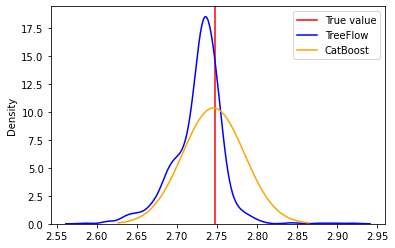

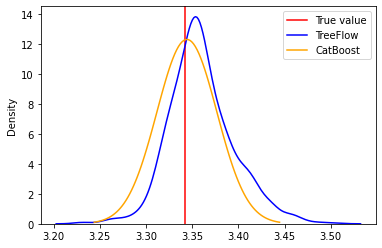

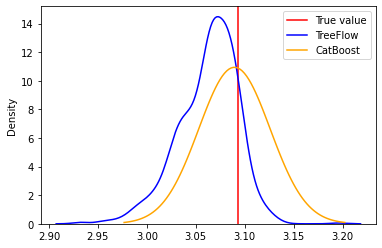

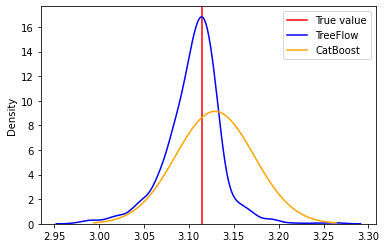

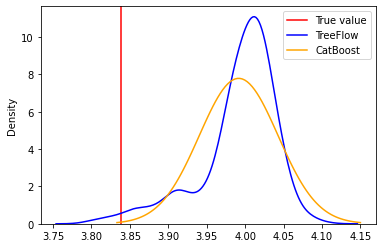

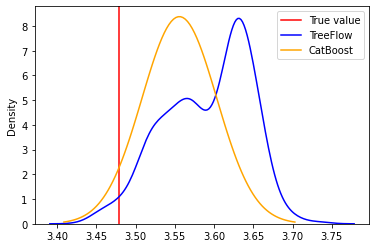

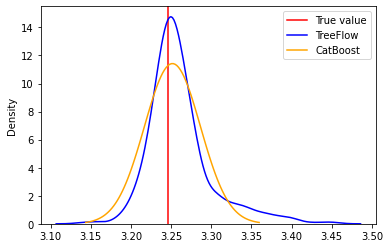

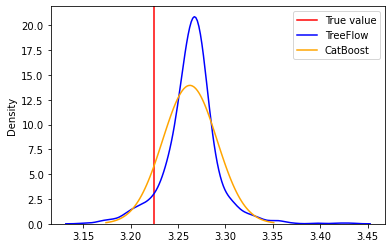

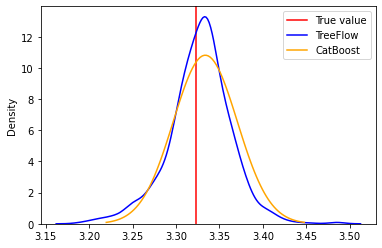

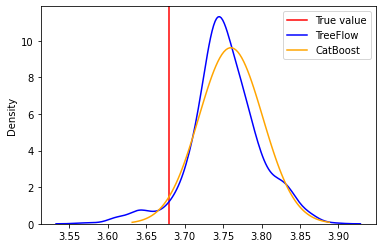

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()